## Yolo 적용을 위한 파이썬과 딥러닝 이해
# 이미지 필터 적용하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 불러오기

In [7]:
abbey = plt.imread('abbey_road.jpg')

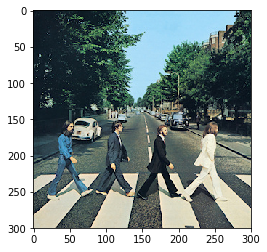

In [8]:
plt.imshow(abbey)

In [9]:
abbey.shape # 행렬 형태

(300, 300, 3)

In [10]:
abbey.dtype # 숫자 타입

dtype('uint8')

In [11]:
abbey.max(), abbey.min() # 최대, 최소값

(255, 0)

In [19]:
abbey = abbey/255.
abbey.dtype

dtype('float64')

### 필터 개념 (Convolution)

In [12]:
a = np.array([[1,2,1], [2,1,2], [1,2,1]])
b = np.array([[1,0,1], [0,1,0], [1,0,1]])

display(a,b)

array([[1, 2, 1],
       [2, 1, 2],
       [1, 2, 1]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

- 두 행렬은 모양이 같다.
- 같은 위치의 값을 곱한 다음 모든 값들을 더해 보자.
- 결과는 5 이다.

In [13]:
a = np.arange(16).reshape(4,4)

display(a,b)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [ ]:
- b 를 a 위에 겹친 다음 처음엔 옆으로, 그다음 아래로 위와 같은 계산을 해보자
- 결과 : [25,30,45,50] => [[25,30], [45,50]]

### 계산 방법

In [29]:
a = np.array([[1,2,1], [2,1,2], [1,2,1]])
b = np.array([[1,0,1], [0,1,0], [1,0,1]])

display(a,b)

array([[1, 2, 1],
       [2, 1, 2],
       [1, 2, 1]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [30]:
a*b # 항목 끼리 곱셈 한다

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [31]:
(a*b).sum() # 모든 항목을 더한다

5

In [25]:
a = np.arange(16).reshape(4,4)

display(a,b)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [26]:
conv = []
for r in range(2): # 4-3+1 (a.shape[0] - b.shape[0] + 1)
    l = []
    for c in range(2): # 4-3+1 (a.shape[1] - b.shape[1] + 1)
        l.append((a[r:r+3, c:c+3]*b).sum())
    conv.append(l)

In [27]:
conv

[[25, 30], [45, 50]]

### 임의 길이의 행렬에 필터 적용

In [32]:
image = np.arange(100).reshape(10,10)
filter = np.array([[1,0,1], [0,1,0], [1,0,1]])/5

In [33]:
conv = []
for r in range(8): # 10-3+1
    l = []
    for c in range(8): # 10-3+1
        l.append((image[r:r+3, c:c+3]*filter).sum())
    conv.append(l)
    
conv

[[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.000000000000004, 18.0],
 [21.0,
  22.000000000000004,
  23.000000000000004,
  24.0,
  25.0,
  26.0,
  27.000000000000004,
  28.000000000000004],
 [31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0],
 [41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.00000000000001, 48.0],
 [51.0, 52.00000000000001, 53.0, 54.0, 55.0, 56.0, 57.00000000000001, 58.0],
 [61.0, 62.00000000000001, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0],
 [71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0],
 [81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0]]

In [35]:
conv = np.array(conv)
conv.shape

(8, 8)

### 사진에 필터 적용

In [53]:
image = abbey[:,:,0] # R 채널, 300X300
filter = np.array([[1,0,1], [0,1,0], [1,0,1]])/5 # 3X3

conv = []
for r in range(298): # 100-3+1
    l = []
    for c in range(298): # 10-3+1
        l.append((image[r:r+3, c:c+3]*filter).sum())
    conv.append(l)
    
conv=np.array(conv)
conv.shape

(298, 298)

In [54]:
conv[conv>1] = 1

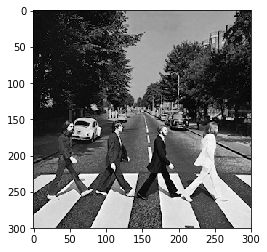

In [55]:
plt.imshow(image, cmap='gray')

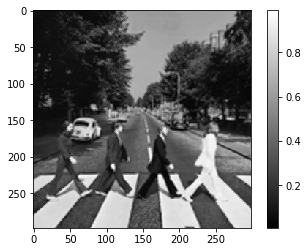

In [56]:
plt.imshow(conv, cmap='gray')
plt.colorbar()

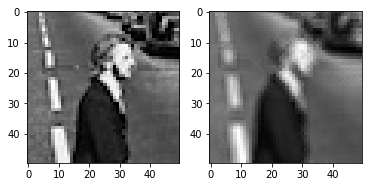

In [65]:
plt.subplot(1,2,1)
plt.imshow(image[150:200, 150:200], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(conv[150:200, 150:200], cmap='gray')

### 모든 채널에 적용하기

In [72]:
red = abbey[:,:,0]
green = abbey[:,:,1]
blue = abbey[:,:,2]

filter = np.array([[1,0,1], [0,1,0], [1,0,1]])/5

conv = []
for r in range(298): # 100-3+1
    l = []
    for c in range(298): # 10-3+1
        l.append([(red[r:r+3, c:c+3]*filter).sum(), (green[r:r+3, c:c+3]*filter).sum(), (blue[r:r+3, c:c+3]*filter).sum()])
    conv.append(l)
    
conv=np.array(conv)
conv[conv>1] = 1
conv[conv<0] = 0
conv.shape

(298, 298, 3)

Text(0.5,1,'filtered')

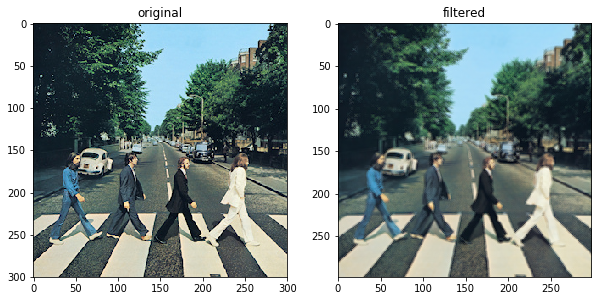

In [76]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.imshow(abbey)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(conv)
plt.title('filtered')

# sharpen
- np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) => 외곽선
- np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) => 샤프닝

In [91]:
red = abbey[:,:,0]
green = abbey[:,:,1]
blue = abbey[:,:,2]

filter = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]) # 8(외곽선), 9(샤프닝), 12, 17

conv = []
for r in range(298): # 100-3+1
    l = []
    for c in range(298): # 10-3+1
        l.append([(red[r:r+3, c:c+3]*filter).sum(), (green[r:r+3, c:c+3]*filter).sum(), (blue[r:r+3, c:c+3]*filter).sum()])
    conv.append(l)
    
conv=np.array(conv)
conv[conv>1] = 1
conv[conv<0] = 0
conv.shape

(298, 298, 3)

Text(0.5,1,'filtered')

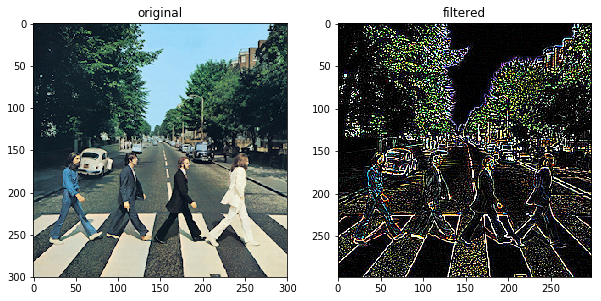

In [92]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.imshow(abbey)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(conv)
plt.title('filtered')

### 기타 필터 및 효과

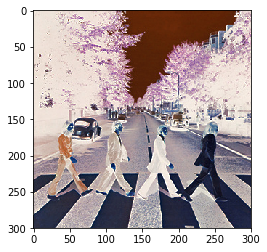

In [93]:
#np.array([[1,3,1], [3,9,3], [1,3,1]])/25 # Blur
#np.array([[-2,0,0], [0,1,0], [0,0,2]]) # Emboss
plt.imshow(1-abbey) => 네거티브 필름

### 이미지 사이즈 줄이기 (Pooling)

In [104]:
a = np.random.randint(10, size=[10,10])
a

array([[5, 0, 6, 2, 4, 2, 7, 5, 4, 6],
       [9, 3, 3, 1, 4, 5, 0, 4, 8, 5],
       [4, 2, 1, 9, 2, 5, 1, 1, 5, 9],
       [7, 1, 0, 3, 6, 3, 1, 5, 6, 6],
       [5, 3, 4, 3, 2, 0, 2, 7, 2, 2],
       [2, 4, 7, 5, 3, 5, 9, 3, 6, 2],
       [7, 7, 6, 7, 3, 7, 0, 2, 0, 9],
       [8, 7, 7, 4, 0, 3, 7, 2, 2, 5],
       [8, 4, 2, 0, 2, 3, 5, 5, 2, 5],
       [5, 4, 6, 4, 8, 5, 9, 6, 2, 4]])

- 2X2 타일로 나누어서 최대값을 얻는다.
- 크기는 반으로 줄어든다 (10X10 => 5X5)

In [105]:
pool = []

for r in range(0,10-1,2):
    l = []
    for c in range(0,10-1,2):
        l.append(a[r:r+2, c:c+2].max())
    pool.append(l)
    
pool = np.array(pool)
pool.shape

(5, 5)

In [106]:
pool

array([[9, 6, 5, 7, 8],
       [7, 9, 6, 5, 9],
       [5, 7, 5, 9, 6],
       [8, 7, 7, 7, 9],
       [8, 6, 8, 9, 5]])

- 이미지가 9X9 인 경우

In [109]:
a = np.random.randint(10, size=[9,9])
a

array([[9, 5, 5, 0, 7, 1, 7, 0, 3],
       [0, 4, 3, 9, 2, 9, 6, 0, 3],
       [8, 9, 3, 3, 7, 9, 0, 9, 7],
       [5, 7, 7, 8, 9, 1, 1, 9, 3],
       [5, 2, 3, 6, 9, 7, 2, 0, 0],
       [7, 1, 5, 0, 3, 9, 4, 3, 6],
       [8, 7, 9, 5, 2, 3, 6, 5, 1],
       [9, 2, 8, 8, 9, 6, 6, 0, 2],
       [4, 3, 6, 7, 6, 9, 5, 8, 5]])

In [110]:
pool = []

for r in range(0,9-1,2):
    l = []
    for c in range(0,9-1,2):
        l.append(a[r:r+2, c:c+2].max())
    pool.append(l)
    
pool = np.array(pool)
pool.shape

(4, 4)

In [111]:
pool

array([[9, 9, 9, 7],
       [9, 8, 9, 9],
       [7, 6, 9, 4],
       [9, 9, 9, 6]])

- 최대값이 아니라 평균값을 구하는 경우

In [109]:
a = np.random.randint(10, size=[9,9])
a

array([[9, 5, 5, 0, 7, 1, 7, 0, 3],
       [0, 4, 3, 9, 2, 9, 6, 0, 3],
       [8, 9, 3, 3, 7, 9, 0, 9, 7],
       [5, 7, 7, 8, 9, 1, 1, 9, 3],
       [5, 2, 3, 6, 9, 7, 2, 0, 0],
       [7, 1, 5, 0, 3, 9, 4, 3, 6],
       [8, 7, 9, 5, 2, 3, 6, 5, 1],
       [9, 2, 8, 8, 9, 6, 6, 0, 2],
       [4, 3, 6, 7, 6, 9, 5, 8, 5]])

In [112]:
pool = []

for r in range(0,9-1,2):
    l = []
    for c in range(0,9-1,2):
        l.append(a[r:r+2, c:c+2].mean()) # mean() 적용
    pool.append(l)
    
pool = np.array(pool)
pool.shape

(4, 4)

In [113]:
pool

array([[4.5 , 4.25, 4.75, 3.25],
       [7.25, 5.25, 6.5 , 4.75],
       [3.75, 3.5 , 7.  , 2.25],
       [6.5 , 7.5 , 5.  , 4.25]])

### 이미지에 MaxPooling 적용

In [114]:
red = abbey[:,:,0]
green = abbey[:,:,1]
blue = abbey[:,:,2]

pool = []

for r in range(0,300-1,2):
    l = []
    for c in range(0,300-1,2):
        l.append([red[r:r+2, c:c+2].max(), green[r:r+2, c:c+2].max(), blue[r:r+2, c:c+2].max()])
    pool.append(l)

pool = np.array(pool)
pool.shape

(150, 150, 3)

Text(0.5,1,'maxpooling')

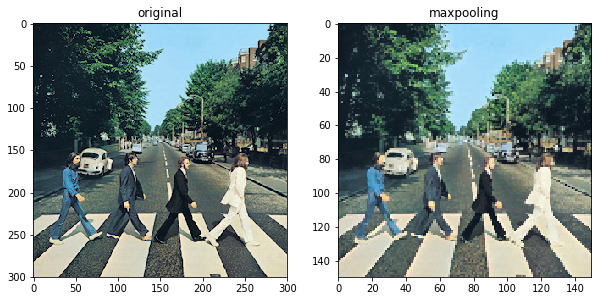

In [115]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.imshow(abbey)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(pool)
plt.title('maxpooling')

### Convolution(필터) 과 Pooling(사이즈줄이기) 이해하기
- Convolution 을 적용하면 (필터사이즈-1) 만큼 크기가 줄어든다.
- Pooling 을 적용하면 크기가 반으로 줄어든다.
- 필터 사이즈가 3일때, 원본이미지(300X300) => Conv(298X298) => Pool(149X149) => Conv(147X147) => Pool(73X73) => ...
- 300X300 인 이미지에 필터 100개인 Convolution 과 Pooling 을 차례로 적용하면 => 149X149 이미지 100개가 생성된다
> 300X300X3 => 149X149X100
- 이런식으로 변환된 이미지를 신경망과 딥러닝에 적용한다. (원본이미지가 필터와 리사이즈를 통과한 값으로 변환된다.)

### 랜덤 함수 적용
- np.random.rand()
- np.random.randn()
- np.random.randint()
- np.random.uniform()
- np.random.normal()
- np.random.choice()
- np.random.permutation()

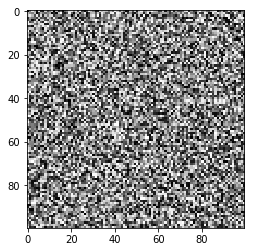

In [94]:
image = np.random.rand(100,100)
plt.imshow(image, cmap='gray')

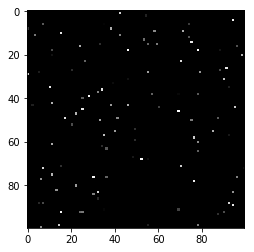

In [116]:
image = np.random.rand(100,100)
image[image>0.01]=0.01
image = image*100
plt.imshow(image, cmap='gray_r')